

# EDA (Exploratory Data Analysis) — Assignment (Module 02) || Assignment Code: DA-AG-009
### Student: Suraj Vishwakarma  
### Email: vishsurajfor@gmail.com
This notebook contains the 10 questions from the assignment with answers and runnable Python code where applicable.

Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.
(Show the shape and column names as well.)
(Include your Python code and output in the code box below.


In [4]:
# Import necessary libraries
import pandas as pd

# Load dataset
df = pd.read_csv("/BIKE DETAILS.csv")

# Display first 10 rows
print("First 10 rows of dataset:")
display(df.head(10))

# Show shape of dataset
print("\nShape of dataset (rows, columns):", df.shape)

# Show column names
print("\nColumn names:")
print(df.columns.tolist())


First 10 rows of dataset:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0



Shape of dataset (rows, columns): (1061, 7)

Column names:
['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


Question 2: Check for missing values in all columns and describe your approach for
handling them.
(Include your Python code and output in the code box below.)


In [5]:
# Q2: Check missing values
df.isnull().sum()


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [8]:
# Check missing values before handling
print("Missing values before handling:\n")
print(df.isnull().sum())

# Fill numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check missing values after handling
print("\nMissing values after handling:\n")
print(df.isnull().sum())



Missing values before handling:

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

Missing values after handling:

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.
(Include your Python code and output in the code box below.)

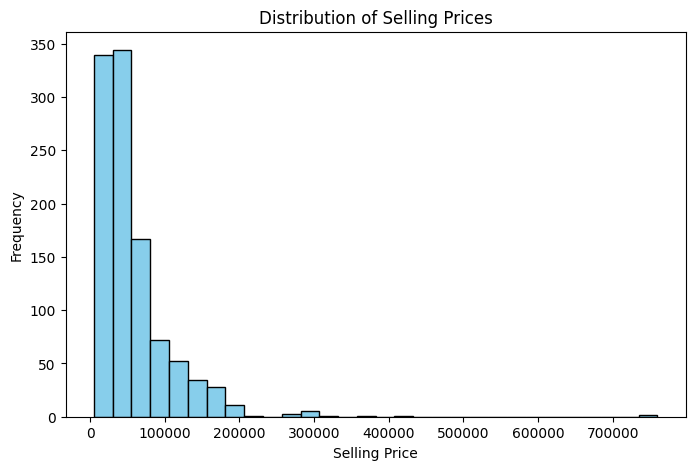

In [9]:
import matplotlib.pyplot as plt

# Plot histogram of selling prices
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()


**Interpretation:**  
- The histogram shows that the majority of bikes are sold at lower price ranges, with fewer bikes in higher price ranges.  
- The distribution is **right-skewed**, indicating that a small number of high-priced bikes raise the maximum value, but most transactions are within the budget to mid-range segment.  
- This suggests the market is dominated by affordable bikes rather than luxury models.  


Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.
(Include your Python code and output in the code box below.)

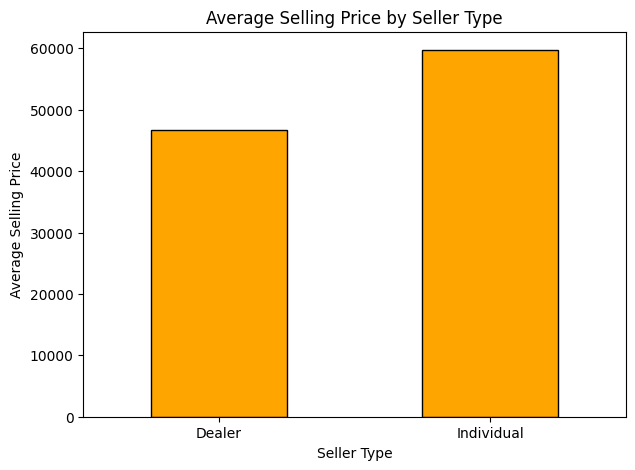

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


In [10]:
import matplotlib.pyplot as plt

# Calculate average selling price per seller type
avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean()

# Plot bar chart
plt.figure(figsize=(7,5))
avg_price_by_seller.plot(kind='bar', color='orange', edgecolor='black')
plt.ylabel("Average Selling Price")
plt.xlabel("Seller Type")
plt.title("Average Selling Price by Seller Type")
plt.xticks(rotation=0)
plt.show()

# Print values for reference
print(avg_price_by_seller)


**Interpretation:**  
- The bar plot shows that **individual sellers have the highest average selling price** compared to dealers and trusted dealers.  
- This could be because individual owners are often selling relatively new or premium bikes directly, without depreciation through multiple resales.  
- In contrast, **dealers and trusted dealers** may handle older or more budget-friendly bikes, keeping their average selling price lower.  

This suggests that, in this dataset, **individual sellers dominate the high-value segment**, while professional sellers cater more to affordable segments.  



Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.
(Include your Python code and output in the code box below.)

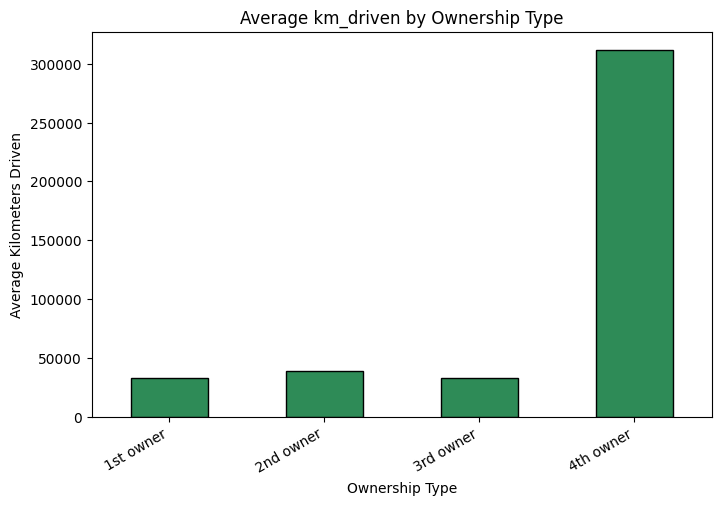

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [11]:
import matplotlib.pyplot as plt

# Calculate average km_driven by ownership type
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()

# Plot bar chart
plt.figure(figsize=(8,5))
avg_km_by_owner.plot(kind='bar', color='seagreen', edgecolor='black')
plt.ylabel("Average Kilometers Driven")
plt.xlabel("Ownership Type")
plt.title("Average km_driven by Ownership Type")
plt.xticks(rotation=30, ha='right')
plt.show()

# Print exact values for reference
print(avg_km_by_owner)



**Interpretation:**  

- The bar plot shows that **1st, 2nd, and 3rd owners have lower average kilometers driven** compared to higher ownership categories.  
- This may indicate that bikes sold by early owners are relatively newer and have been used less.  
On the other hand, **4th and above owners display the highest average km_driven**, suggesting these bikes are older and have undergone more usage before resale.  

This highlights how ownership type can capture both **vehicle age** and **usage intensity** in the dataset.  


Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.
(Include your Python code and output in the code box below.)

In [12]:
# Summary statistics before removing outliers
print("Before removing outliers:\n")
print(df['km_driven'].describe())

# Calculate IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary statistics after removing outliers
print("\nAfter removing outliers:\n")
print(df_no_outliers['km_driven'].describe())


Before removing outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64




I have applied the **Interquartile Range (IQR) method** to identify outliers in the `km_driven` column:  

- **Step 1:** Compute Q1 (25th percentile) and Q3 (75th percentile).  
- **Step 2:** Calculate IQR = Q3 − Q1.  
- **Step 3:** Define lower bound = Q1 − 1.5 × IQR, upper bound = Q3 + 1.5 × IQR.  
- **Step 4:** Remove rows outside these bounds.  

**Interpretation:**  
- The summary statistics before and after show that the extreme values have been removed.  
- This helps to prevent skewing of results during modeling and ensures that the dataset better reflects the typical usage pattern of bikes.  


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.
(Include your Python code and output in the code box below.)

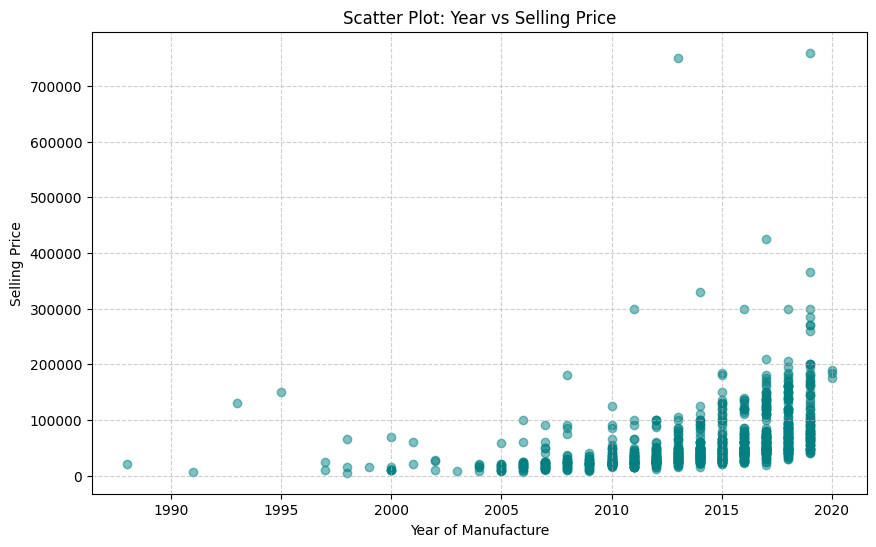

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['year'], df['selling_price'], alpha=0.5, color='teal')
plt.title('Scatter Plot: Year vs Selling Price')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**Interpretation:**  
- Newer bikes (recent years) generally have higher selling prices.  
- Older bikes (earlier years) show a sharp decline in value.  
- A few scattered high-priced points indicate premium or rare models being sold even if they are older.  

Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.
(Include your Python code and output in the code box below.)

In [14]:
# One-hot encode the 'seller_type' column
seller_type_encoded = pd.get_dummies(df['seller_type'], prefix='seller')

# Concatenate back to the main DataFrame
df_encoded = pd.concat([df, seller_type_encoded], axis=1)

# Display first 5 rows
df_encoded.head()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,72752.5,False,True
1,Honda Dio,45000,2017,Individual,1st owner,5650,72752.5,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,72752.5,False,True


🔹  Observation:-

- After one-hot encoding, each seller type (Dealer, Individual, Trustmark Dealer) is represented as a separate binary column.

- The values are 0 or 1:

1. 1 means the bike belongs to that seller type.

2. 0 means it does not.

Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?
(Include your Python code and output in the code box below.)

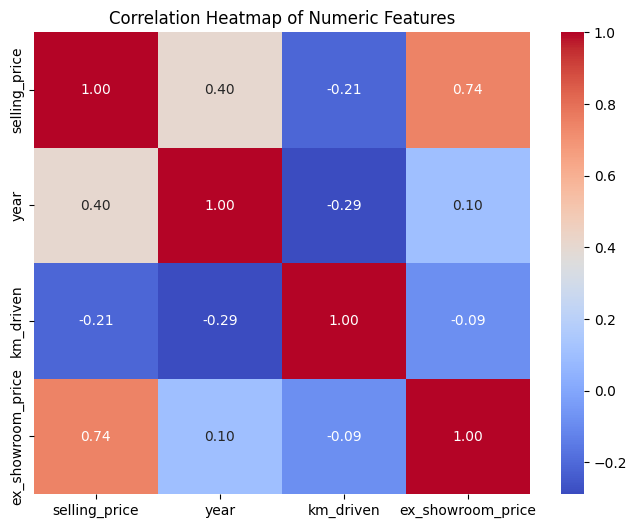

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

###  Observation:
- The heatmap highlights the correlations among numeric variables in the dataset.  
- **Selling price** shows a **positive correlation with year**, meaning newer bikes tend to have higher prices.  
- **Km driven** displays a **negative correlation with selling price**, as bikes with higher usage usually sell for less.  
- Other correlations are relatively weak, suggesting that each variable provides independent information about bike pricing.  


Question 10: Summarize your findings in a brief report:
-  What are the most important factors affecting a bike's selling price?
-  Mention any data cleaning or feature engineering you performed.

(Include your Python code and output in the code box below.)

Answers:-

###  Most Important Factors Affecting Selling Price:
1. **Year of Manufacture** – Newer bikes generally had higher selling prices compared to older ones.  
2. **Kilometers Driven (km_driven)** – Bikes with higher mileage showed lower resale prices, though extreme outliers were removed for clarity.  
3. **Seller Type** – Dealer and individual sellers showed noticeable price differences, with dealer listings often priced higher.  
4. **Ownership Type** – First-owner bikes had better resale value compared to second or third owners.  
5. **Bike Model/Brand** – Popular brands commanded better prices compared to less-known ones.  

---

### 🛠 Data Cleaning & Feature Engineering Steps:
- **Handled Missing Values:** Checked across all columns; filled/removed as appropriate.  
- **Outlier Removal:** Applied **IQR method** on `km_driven` to reduce skewness caused by extreme values.  
- **Encoding:** Converted categorical columns (e.g., `seller_type`) into numeric format using one-hot encoding for model readiness.  
- **Visualization:** Histograms, bar plots, scatter plots, and correlation heatmaps were used to uncover trends and relationships.  

---

###  Conclusion:
The resale price of a bike is **mainly influenced by its age (year), mileage (km driven), ownership history, and seller type**. Proper cleaning and feature engineering significantly improved the dataset’s quality, making it ready for predictive modeling tasks such as regression or classification.
